In [2]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall

In [3]:
data_path='/kaggle/input/stanford-dogs-dataset/images/Images'

In [4]:
import os
print(os.path.exists(data_path))

True


In [5]:
#Dimension of the image given
img_height, img_width = 224, 224
batch_size = 32

In [6]:
#Data augmentation parameters
data_gen = ImageDataGenerator(
    rescale=1./255, #Normalizing the pixel values of the image to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into training and validation sets
)

In [7]:
#Data generators
train_generator  = data_gen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='categorical' specifies that the labels are encoded as one-hot vectors.
    class_mode='categorical',
    subset='training',  # Use the training set
    shuffle = True,
)


Found 16508 images belonging to 120 classes.


In [8]:
#Data generators
validation_generator  = data_gen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the validation set
)


Found 4072 images belonging to 120 classes.


**Normal CNN**

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [10]:
# CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(120, activation='softmax'))


In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])
#Optimizer-RMSProp
#Loss function- Categorical Cross Entropy

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#patience - number of epochs to wait before stopping the training process if the validation loss has not improved
checkpoint = ModelCheckpoint("NormalCNN.h5", save_best_only=True, save_weights_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=5)


In [14]:
history1 = model.fit(train_generator, epochs=30, validation_data=validation_generator,callbacks=[checkpoint, earlystop])

Epoch 1/30
516/516 [==============================] - 348s 660ms/step - loss: 4.7257 - accuracy: 0.0168 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5658 - val_accuracy: 0.0314 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
516/516 [==============================] - 283s 548ms/step - loss: 4.3595 - accuracy: 0.0468 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.2166 - val_accuracy: 0.0587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
516/516 [==============================] - 308s 597ms/step - loss: 4.0779 - accuracy: 0.0824 - precision: 0.6800 - recall: 0.0010 - val_loss: 4.0254 - val_accuracy: 0.0955 - val_precision: 0.4286 - val_recall: 7.3674e-04
Epoch 4/30
516/516 [==============================] - 280s 543ms/step - loss: 3.8471 - accuracy: 0.1146 - precision: 0.6370 - recall: 0.0052 - val_loss: 4.0084 - val_accuracy: 0.1031 - val_precision: 0.5200 - val_recall: 0.0032
Epoch 5/30
516/516 [==============================] 

In [15]:
#Accuracy,Recall,Precision and f1_score measure
loss,accuracy,precision,recall = model.evaluate(validation_generator, steps=validation_generator.n//32)

print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)
print('Validation Recall:', recall)
print('Validation Precision:', precision)
f1 = (2*precision*recall)/(precision+recall)
print('Validation F1 score:',f1)

127/127 [==============================] - 54s 427ms/step - loss: 4.8434 - accuracy: 0.1540 - precision: 0.2540 - recall: 0.1014
Validation Loss: 4.8433942794799805
Validation Accuracy: 0.15403543412685394
Validation Recall: 0.1013779491186142
Validation Precision: 0.25400739908218384
Validation F1 score: 0.14491733725249475


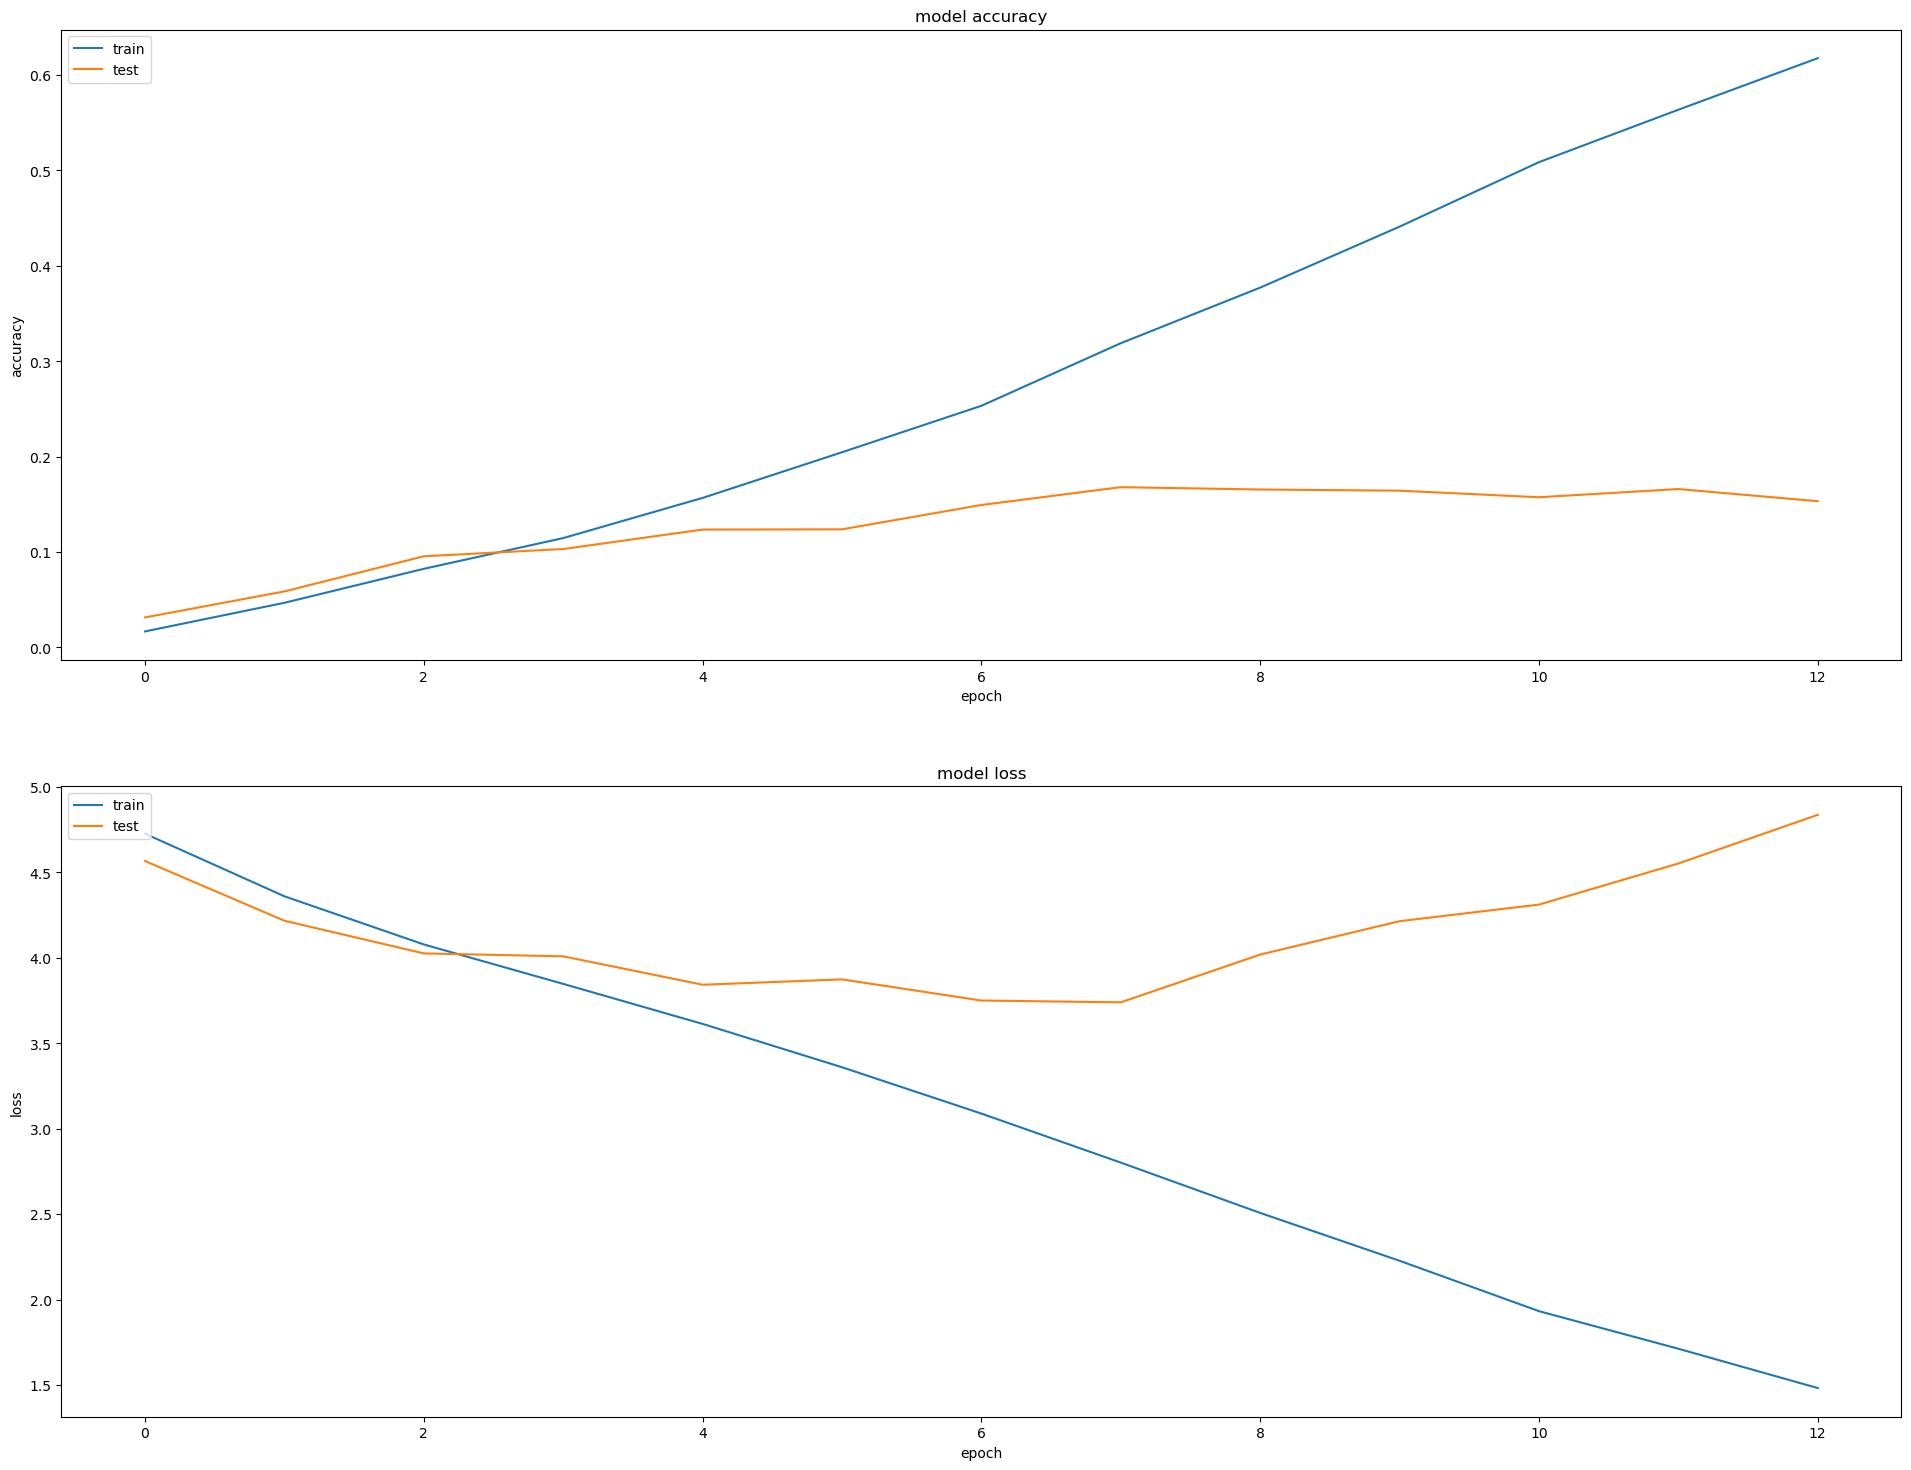

In [16]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplots_adjust(right=3, top=3)
plt.show()

In [17]:
import pickle
with open("PES1UG20CS901_history_Normal.pkl", "wb") as f:
    pickle.dump(history1.history,f)


**Transfer Learning**

In [21]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model


In [22]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [24]:
InceptionV3 = tf.keras.applications.InceptionV3(include_top= False, input_shape= (img_width, img_height, 3), weights= 'imagenet')
#InceptionV3.summary()
model = Sequential()
for layer in InceptionV3.layers:
    layer.trainable= False
model.add(InceptionV3)
model.add(GlobalAveragePooling2D())
model.add(Dense(120,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


In [25]:
model.compile(optimizer=keras.optimizers.Adam(lr= 0.0001), loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])
#optimizer-Adam
#Learning rate-0.0001
#Loss function- Categorical Cross Entropy

In [26]:
#mode-determines whether to save the model weights for the best metric value seen so far ('max' or 'min').
model_checkpoint = ModelCheckpoint('best_model_TL.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=1)
#patience - number of epochs to wait before stopping the training process if the validation loss has not improved
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
#mode - determines whether to monitor the validation loss for improvement ('min') or degradation ('max')


In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [30]:
history2 = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
516/516 [==============================] - ETA: 0s - loss: 1.2058 - accuracy: 0.6952 - precision_1: 0.8019 - recall_1: 0.6253
Epoch 1: val_accuracy improved from -inf to 0.73355, saving model to best_model_TL.h5
516/516 [==============================] - 318s 606ms/step - loss: 1.2058 - accuracy: 0.6952 - precision_1: 0.8019 - recall_1: 0.6253 - val_loss: 1.0308 - val_accuracy: 0.7335 - val_precision_1: 0.7849 - val_recall_1: 0.7078
Epoch 2/30
516/516 [==============================] - ETA: 0s - loss: 0.7799 - accuracy: 0.7757 - precision_1: 0.8209 - recall_1: 0.7498
Epoch 2: val_accuracy improved from 0.73355 to 0.74607, saving model to best_model_TL.h5
516/516 [==============================] - 290s 563ms/step - loss: 0.7799 - accuracy: 0.7757 - precision_1: 0.8209 - recall_1: 0.7498 - val_loss: 0.9899 - val_accuracy: 0.7461 - val_precision_1: 0.7921 - val_recall_1: 0.7232
Epoch 3/30
516/516 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.8055 - pre

In [33]:
with open("PES1UG20CS901_history_Pretrained.pkl", "wb") as f:
    pickle.dump(history2.history,f)

In [32]:
loss2,accuracy2,precision2,recall2 = model.evaluate(validation_generator, steps=validation_generator.n//32)

print('Validation Loss:', loss2)
print('Validation Accuracy:', accuracy2)
print('Validation Recall:', recall2)
print('Validation Precision:', precision2)
f1_2 = (2*precision2*recall2)/(precision+recall2)
print('Validation F1 score:',f1_2)

127/127 [==============================] - 56s 440ms/step - loss: 0.9946 - accuracy: 0.7532 - precision_1: 0.7950 - recall_1: 0.7291
Validation Loss: 0.994551420211792
Validation Accuracy: 0.7531988024711609
Validation Recall: 0.7290846705436707
Validation Precision: 0.7950093746185303
Validation F1 score: 1.1791960608399095


In [34]:
metrics_df = pd.DataFrame({'accuracy':[accuracy,accuracy2],
                              'precision':[precision,precision2],
                              'recall':[recall,recall2],
                              'f1 score':[f1,f1_2]},index=['Normal','Pretrained'])
metrics_df

,accuracy,precision,recall,f1 score
Normal,0.154035,0.254007,0.101378,0.144917
Pretrained,0.753199,0.795009,0.729085,1.179196


In [35]:
metrics_df.to_csv('PES1UG20CS901_A1_TDL23.csv')